<a href="https://colab.research.google.com/github/dbr-ufs/solar_fotovoltaica/blob/master/8_Rastreador_Solar_de_um_eixo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adaptado do seguinte exemplo: https://pvlib-python.readthedocs.io/en/stable/auto_examples/plot_single_axis_tracking.html

Comandos iniciais para inicializar o PVLib

In [1]:
%matplotlib inline
!pip install pvlib
import pvlib

Rastreamento em um eixo
====================

Examplo do modelo de inclinação em rastreadores de um eixo.


Este exemplo mostra o uso básico dos cálculos de posição do rastreador do PVLib com :py:meth:`pvlib.tracking.singleaxis`.  Os exemplos mostrados aqui demonstram
como os parâmetros do rastreador afetam os ângulos de inclinação gerados.

Como o ângulo do rastreador é baseado em onde o sol está no céu, calculando
a posição solar é sempre o primeiro passo.

True-tracking
-------------

O algoritmo de rastreamento básico é chamado de "true-tracking". Ele orienta os painéis em direção ao sol, tanto quanto possível, a fim de maximizar a seção transversal apresentada em direção à irradiância direta.





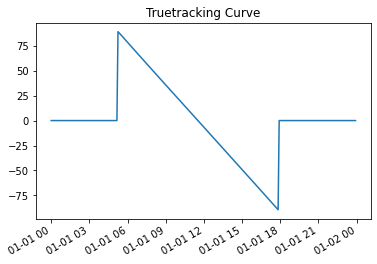

In [2]:
from pvlib import solarposition, tracking
import pandas as pd
import matplotlib.pyplot as plt

tz = 'America/Bahia' # https://stackoverflow.com/questions/13866926/is-there-a-list-of-pytz-timezones
lat, lon = -10.9095, -37.0748 # Aracaju = -10.9095, -37.0748

times = pd.date_range('2019-01-01', '2019-01-02', closed='left', freq='5min',
                      tz=tz)
solpos = solarposition.get_solarposition(times, lat, lon)

truetracking_angles = tracking.singleaxis(
    apparent_zenith=solpos['apparent_zenith'],
    apparent_azimuth=solpos['azimuth'],
    axis_tilt=0,
    axis_azimuth=0, # 180 se estiver no hemisfério Norte
    max_angle=90,
    backtrack=False,  # for true-tracking
    gcr=0.5)  # irrelevant for true-tracking

truetracking_position = truetracking_angles['tracker_theta'].fillna(0)
truetracking_position.plot(title='Truetracking Curve')

plt.show()

Backtracking
-------------

Como o truetracking produz um ângulo de inclinação acentuado na manhã e na tarde, ele causará sombreamento de fileira a fileira conforme as sombras das fileiras adjacentes caem umas sobre as outras. Para evitar isso, os rastreadores podem girar para trás quando o sol está perto do horizonte - "retrocedendo". O ângulo de sombreamento depende da geometria da linha, portanto, o parâmetro gcr deve ser especificado. Quanto maior for o gcr, mais estreito será o espaçamento entre as linhas e mais agressivamente o array deve retroceder.



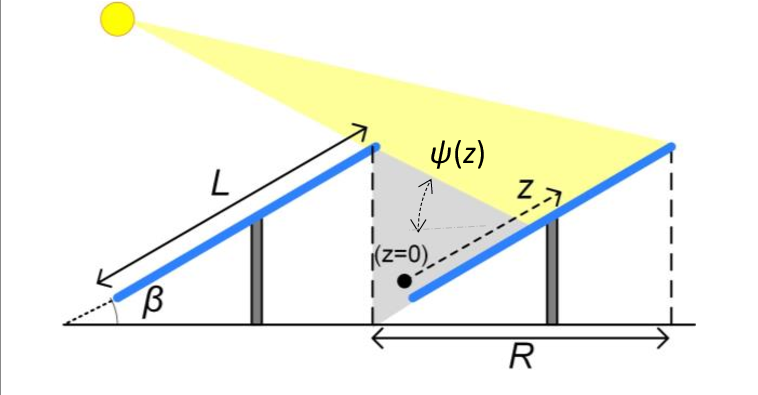

Ground-coverage ratio (GCR) é a razão entre a área do módulo e a área do terreno, ou a razão entre o comprimento da matriz e a distância entre fileiras  (L/R). O sombreamento entre linhas aumenta com o GCR. β é o ângulo de inclinação e z mede a altura ao longo da matriz. O ângulo de blindagem ψ (z) representa uma redução do campo de visão bidimensional na altura z.

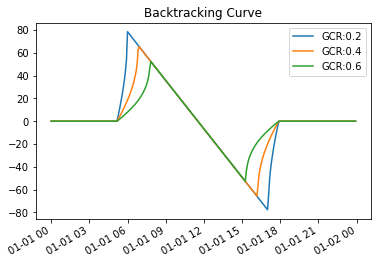

In [3]:
fig, ax = plt.subplots()

for gcr in [0.2, 0.4, 0.6]:
    backtracking_angles = tracking.singleaxis(
        apparent_zenith=solpos['apparent_zenith'],
        apparent_azimuth=solpos['azimuth'],
        axis_tilt=0,
        axis_azimuth=0, # 180 se estiver no hemisfério Norte
        max_angle=90,
        backtrack=True,
        gcr=gcr)

    backtracking_position = backtracking_angles['tracker_theta'].fillna(0)
    backtracking_position.plot(title='Backtracking Curve',
                               label='GCR:{:0.01f}'.format(gcr),
                               ax=ax)

plt.legend()
plt.show()

# Tarefa

Explore o comando `tracking.singleaxis` e plote gráficos variando as entradas (localização, tilt, azimuth, ...) e as saídas (tracker_theta, aoi, ...). Explique os resultados. Exemplo de análise: ver o efeito que o `GCR` causa no `aoi`, mudar cidades/locais, ...

Link: https://pvlib-python.readthedocs.io/en/stable/generated/pvlib.tracking.singleaxis.html

